In [2]:
from PIL import Image, ImageDraw, ImageFont
import random
import string
import io

In [3]:
def verify_code():
    # 定义变量，用于画面的背景色、宽、高 RGB
    bgcolor = (random.randrange(20, 100), random.randrange(
        20, 100), 255)
    width = 100
    height = 25
    # 创建画面对象
    im = Image.new('RGB', (width, height), bgcolor)
    # 创建画笔对象
    draw = ImageDraw.Draw(im)

    # 调用画笔的 point()函数绘制噪点
    for i in range(0, 100):
        xy = (random.randrange(0, width), random.randrange(0, height))
    fill = (random.randrange(0, 255), 255, random.randrange(0, 255))
    draw.point(xy, fill=fill)
    
    # 定义验证码的备选值
    characters = string.digits + string.ascii_uppercase
    # 随机选取 4 个值作为验证码
    rand_str = ''
    for _ in range(0, 4):
        rand_str += random.choice(characters)
        
    # 构造字体对象，ubuntu 的字体路径为
    " / usr / share / fonts / truetype / freefont"
    font = ImageFont.truetype('STSONG.TTF', 23)
    # 构造字体颜色
    fontcolor = (255, random.randrange(0, 255), random.randrange(0,
                                                                 255))
    # 绘制 4 个字
    draw.text((5, 2), rand_str[0], font=font, fill=fontcolor)
    draw.text((25, 2), rand_str[1], font=font, fill=fontcolor)
    draw.text((50, 2), rand_str[2], font=font, fill=fontcolor)
    draw.text((75, 2), rand_str[3], font=font, fill=fontcolor)
    # 释放画笔
    del draw

    buf = io.BytesIO()
    # 将图片保存在内存中，文件类型为 png
    im.save(buf, 'png')
    # 展示图片
    im.show()

verify_code()

0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ


Text(0.5, 1.0, 'BFXB')

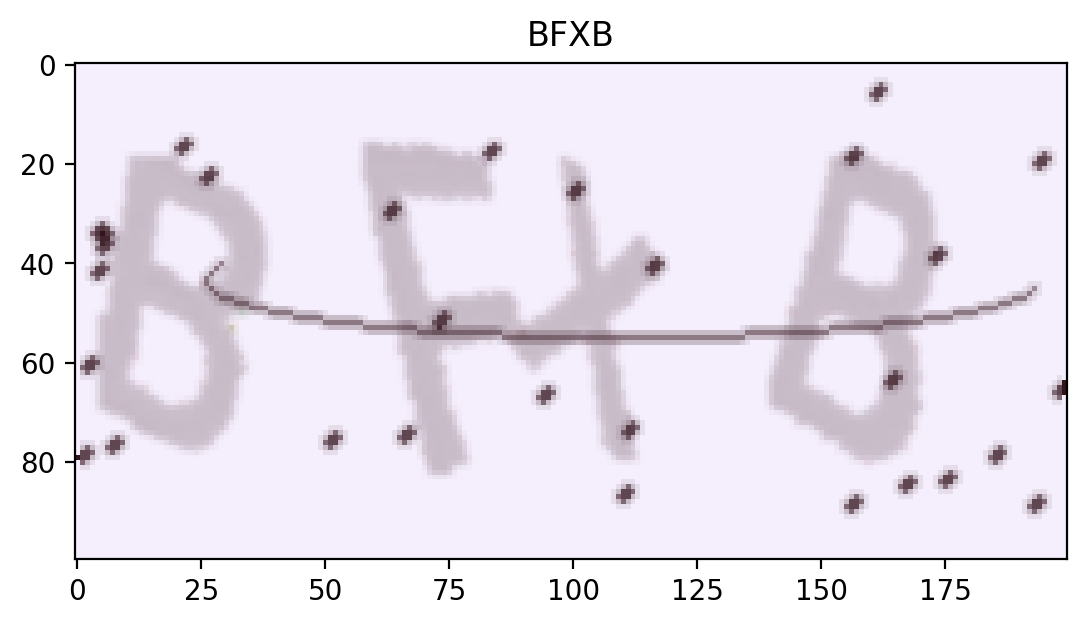

In [5]:
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import string
characters = string.digits + string.ascii_uppercase # 共有 10 个数字和 26 个英文字母
print(characters)

width, height, n_len, n_class = 200, 100, 4, len(characters)

generator = ImageCaptcha(width=width, height=height)
random_str = ''.join([random.choice(characters) for _ in range(4)])
img = generator.generate_image(random_str)

plt.imshow(img)
plt.title(random_str)

In [6]:
# 生成6k张图片并保存下来
from captcha.image import ImageCaptcha
from tqdm import tqdm
import random
import os

width = 200
height = 100

generator = ImageCaptcha(width=width, height=height)
if not os.path.exists('images'):
    os.makedirs('images')
for i in tqdm(range(6000)):
    random_str = ''.join([random.choice(characters) for _ in range(4)])
    img = generator.generate_image(random_str)
    img.save('images/%s_%s.png' % (i, random_str))

100%|██████████| 6000/6000 [00:40<00:00, 147.15it/s]


In [6]:
# 补充4k张图片
from captcha.image import ImageCaptcha
from tqdm import tqdm
import random
import os

width = 200
height = 100

generator = ImageCaptcha(width=width, height=height)

for i in tqdm(range(4000)):
    random_str = ''.join([random.choice(characters) for _ in range(4)])
    img = generator.generate_image(random_str)
    img.save('images/%s_%s.png' % (i+6000, random_str))

100%|██████████| 4000/4000 [01:58<00:00, 33.76it/s]
